<a href="https://colab.research.google.com/github/ScriptSherpa/SheSafe-Gesture-Detection/blob/main/shesafe_gesture_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('/content/model.keras')
print("✅ Model loaded successfully.")


✅ Model loaded successfully.


Saving Screenshot (20).png to Screenshot (20) (1).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


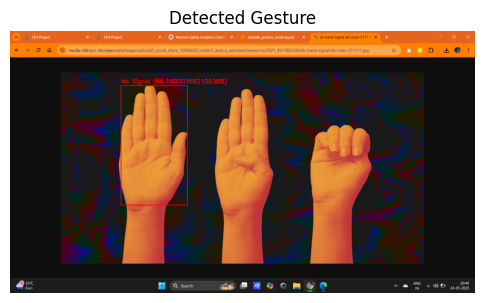

In [11]:
import cv2
import numpy as np
# Install mediapipe if not already installed
!pip install mediapipe
import mediapipe as mp
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model
model = load_model('/content/model.keras')
labels = ['No Signal', 'Signal for Help']
IMG_SIZE = 100

# Initialize Mediapipe Hand detector
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

# Upload an image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read and preprocess
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image_rgb)

# Copy for drawing
output_image = image_rgb.copy()

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Get bounding box around the hand
        h, w, _ = image.shape
        x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * w) - 20
        y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * h) - 20
        x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * w) + 20
        y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * h) + 20

        x_min, y_min = max(0, x_min), max(0, y_min)
        x_max, y_max = min(w, x_max), min(h, y_max)

        # Crop hand region
        hand_img = image_rgb[y_min:y_max, x_min:x_max]
        hand_img = cv2.resize(hand_img, (IMG_SIZE, IMG_SIZE)) / 255.0
        input_img = np.expand_dims(hand_img, axis=0)

        # Predict gesture
        pred = model.predict(input_img)
        pred_class = np.argmax(pred)
        confidence = round(100 * np.max(pred), 2)
        label = labels[pred_class]

        # Draw box and label
        color = (0, 255, 0) if label == 'Signal for Help' else (255, 0, 0)
        cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), color, 2)
        cv2.putText(output_image, f"{label} ({confidence}%)", (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

else:
    print("🖐️ No hand detected.")

# Show result
plt.figure(figsize=(6,6))
plt.imshow(output_image)
plt.axis('off')
plt.title("Detected Gesture")
plt.show()

Saving Screenshot (20).png to Screenshot (20).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


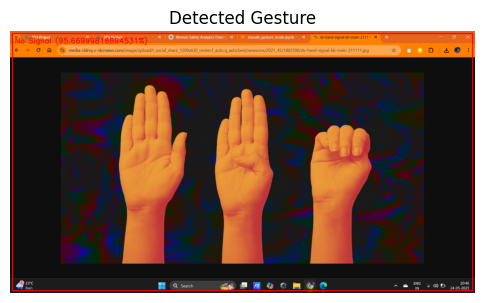

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('/content/model.keras')
labels = ['No Signal', 'Signal for Help']
IMG_SIZE = 100

# Upload image
from google.colab import files
uploaded = files.upload()  # Upload an image like "test.jpg"
image_path = list(uploaded.keys())[0]

# Load image using OpenCV
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Create a copy for drawing
output_img = original_img.copy()

# Resize + normalize for model input
resized_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE)) / 255.0
input_img = np.expand_dims(resized_img, axis=0)

# Prediction
pred = model.predict(input_img)
pred_class = np.argmax(pred)
confidence = round(100 * np.max(pred), 2)
label = labels[pred_class]

# Draw rectangle and label
start_point = (10, 10)
end_point = (output_img.shape[1] - 10, output_img.shape[0] - 10)
color = (0, 255, 0) if label == 'Signal for Help' else (255, 0, 0)
thickness = 3
cv2.rectangle(output_img, start_point, end_point, color, thickness)

# Put label text
text = f"{label} ({confidence}%)"
cv2.putText(output_img, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Show the result
plt.figure(figsize=(6,6))
plt.imshow(output_img)
plt.axis('off')
plt.title("Detected Gesture")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


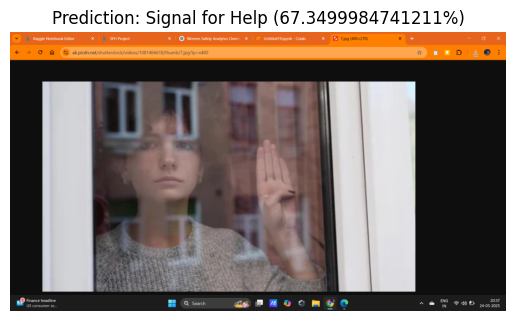

In [9]:
# Predict
pred = model.predict(input_img)
pred_class = np.argmax(pred)
confidence = round(100 * np.max(pred), 2)
pred_label = labels[pred_class]

# Display result
plt.imshow(img)
plt.title(f"Prediction: {pred_label} ({confidence}%)")
plt.axis('off')
plt.show()


In [4]:
def predict_gesture(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (100, 100)) / 255.0
    input_img = np.expand_dims(img_resized, axis=0)

    pred = model.predict(input_img)
    pred_class = np.argmax(pred)
    confidence = round(100 * np.max(pred), 2)
    pred_label = labels[pred_class]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_label} ({confidence}%)")
    plt.axis('off')
    plt.show()
